# Projet 1 : Concentrations des polluants en Région Centre-Val de Loire

## Import des bibliothèques dont nous avons besoin pour ce projet

In [1]:
import folium
import requests
from pandas.io.json import json_normalize
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Liaison avec l'API

In [2]:
data = requests.get(url="https://services1.arcgis.com/HzzPcgRsxxyIZdlU/arcgis/rest/services/mes_centre_val_de_loire_mensuel_poll_princ_1/FeatureServer/0/query?where=1%3D1&outFields=*&outSR=4326&f=json").json()

## Récupération des données en DataFrame

In [3]:
result = json_normalize(data['features'])
df = pd.DataFrame(result)
print(df)

     attributes.ESRI_OID attributes.code_station attributes.date_debut  \
0                      1                 FR34051   2019-06-01 00:00:00   
1                      2                 FR34051   2018-08-01 00:00:00   
2                      3                 FR34051   2018-06-01 00:00:00   
3                      4                 FR34051   2018-07-01 00:00:00   
4                      5                 FR34051   2019-05-01 00:00:00   
5                      6                 FR34051   2018-09-01 00:00:00   
6                      7                 FR34051   2019-04-01 00:00:00   
7                      8                 FR34051   2019-03-01 00:00:00   
8                      9                 FR34051   2018-10-01 00:00:00   
9                     10                 FR34051   2018-12-01 00:00:00   
10                    11                 FR34051   2019-01-01 00:00:00   
11                    12                 FR34051   2018-11-01 00:00:00   
12                    13              

## Nous créons notre carte

In [4]:
carte = folium.Map(location = [47.5, 1.6833], zoom_start=8)

carte

## Sélection des données dans la DataFrame

In [5]:
gpville = df.groupby(['attributes.nom_com', 'attributes.nom_polluant']).mean()
posVille = df.groupby(['attributes.nom_com']).mean()

## Utilisation d'un overlay pour notre carte

In [6]:
overlay_region = f'/home/shikshik/Téléchargements/Projet 1/CARTE_PROJET/overlay_region.json'

In [7]:
folium.GeoJson(
    overlay_region,  
    name='Région Centre'
).add_to(carte)

folium.LayerControl().add_to(carte)

carte

## Sélection de données différentes en DataFrame

Astuce pour faire tout ça en 6 fois moins de ligne de code plus bas !

In [8]:
#-----------------Bourges
Bourges=df[(df["attributes.nom_com"] == "Bourges")]
Bourges=Bourges.sort_values(by = 'attributes.date_debut')
#-----------------Blois
Blois=df[(df["attributes.nom_com"] == "Blois")]
Blois=Blois.sort_values(by = 'attributes.date_debut')
#------------------------Chanceaux-sur-Choisille
Chanceaux_sur_Choisille=df[(df["attributes.nom_com"] == "Chanceaux-sur-Choisille")]
Chanceaux_sur_Choisille=Chanceaux_sur_Choisille.sort_values(by = 'attributes.date_debut')
#------------------------Chartres
Chartres=df[(df["attributes.nom_com"] == "Chartres")]
Chartres=Chartres.sort_values(by = 'attributes.date_debut')
#------------------------Châteauroux
Chateauroux=df[(df["attributes.nom_com"] == "Châteauroux")]
Chateauroux=Chateauroux.sort_values(by = 'attributes.date_debut')
#------------------------Dreux
Dreux=df[(df["attributes.nom_com"] == "Dreux")]
Dreux=Dreux.sort_values(by = 'attributes.date_debut')
#------------------------Faverolles-en-Berry
Faverolles_en_Berry=df[(df["attributes.nom_com"] == "Faverolles-en-Berry")]
Faverolles_en_Berry=Faverolles_en_Berry.sort_values(by = 'attributes.date_debut')
#------------------------Issoudun
Issoudun=df[(df["attributes.nom_com"] == "Issoudun")]
Issoudun=Issoudun.sort_values(by = 'attributes.date_debut')
#------------------------Joué-lès-Tours
Joue_les_Tours=df[(df["attributes.nom_com"] == "Joué-lès-Tours")]
Joue_les_Tours=Joue_les_Tours.sort_values(by = 'attributes.date_debut')
#------------------------Lucé
Luce=df[(df["attributes.nom_com"] == "Lucé")]
Luce=Luce.sort_values(by = 'attributes.date_debut')
#------------------------Marigny-les-Usages
Marigny_les_Usages=df[(df["attributes.nom_com"] == "Marigny-les-Usages")]
Marigny_les_Usages=Marigny_les_Usages.sort_values(by = 'attributes.date_debut')
#------------------------Montargis
Montargis=df[(df["attributes.nom_com"] == "Montargis")]
Montargis=Montargis.sort_values(by = 'attributes.date_debut')
#------------------------Montierchaume
Montierchaume=df[(df["attributes.nom_com"] == "Montierchaume")]
Montierchaume=Montierchaume.sort_values(by = 'attributes.date_debut')
#------------------------Orléans
Orleans=df[(df["attributes.nom_com"] == "Orléans")]
Orleans=Orleans.sort_values(by = 'attributes.date_debut')
#------------------------Oysonville
Oysonville=df[(df["attributes.nom_com"] == "Oysonville")]
Oysonville=Oysonville.sort_values(by = 'attributes.date_debut')
#------------------------Saint-Jean-de-Braye
Saint_Jean_de_Braye=df[(df["attributes.nom_com"] == "Saint-Jean-de-Braye")]
Saint_Jean_de_Braye=Saint_Jean_de_Braye.sort_values(by = 'attributes.date_debut')
#------------------------Saint-Rémy-sur-Avre
Saint_Remy_sur_Avre=df[(df["attributes.nom_com"] == "Saint-Rémy-sur-Avre")]
Saint_Remy_sur_Avre=Saint_Remy_sur_Avre.sort_values(by = 'attributes.date_debut')
#------------------------Tours
Tours=df[(df["attributes.nom_com"] == "Tours")]
Tours=Tours.sort_values(by = 'attributes.date_debut')
#------------------------Verneuil
Verneuil=df[(df["attributes.nom_com"] == "Verneuil")]
Verneuil=Verneuil.sort_values(by = 'attributes.date_debut')

## Nous choisissons une couleur unique pour nos polluants.

In [9]:
Polluants_type_colors = {    
  'NO': 'darkblue',
  'PM10': 'darkgreen',
  'O3': 'darkviolet',
  'NO2': 'skyblue',
  'PM2.5': 'red',
  'CO': 'black',
}

## Création des graphiques

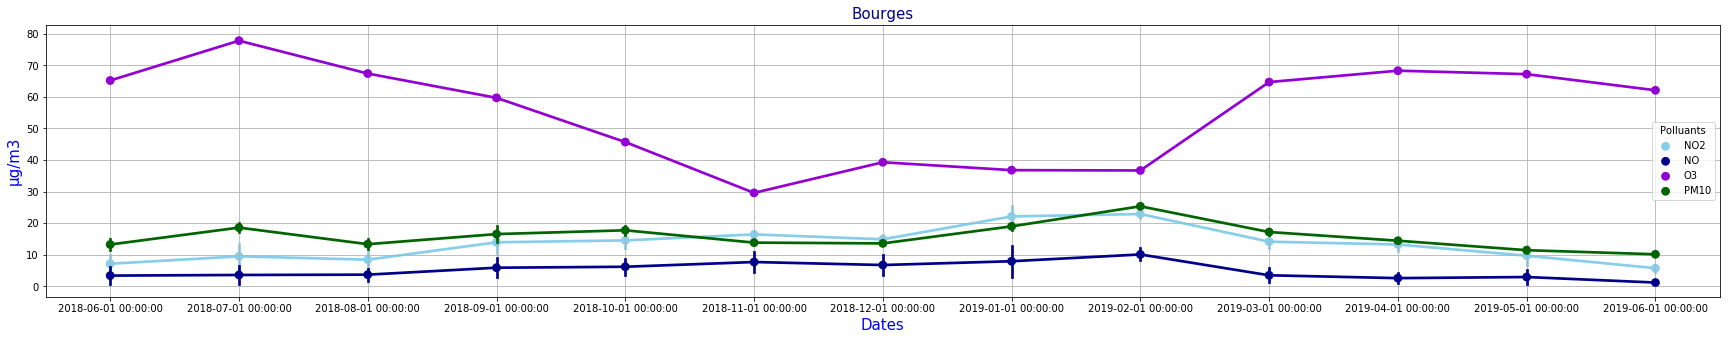

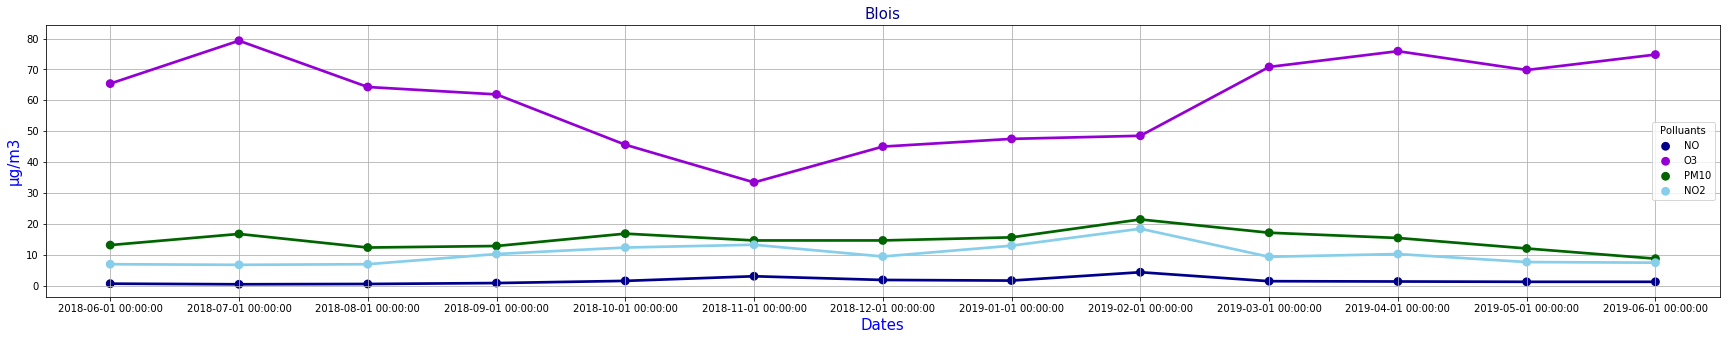

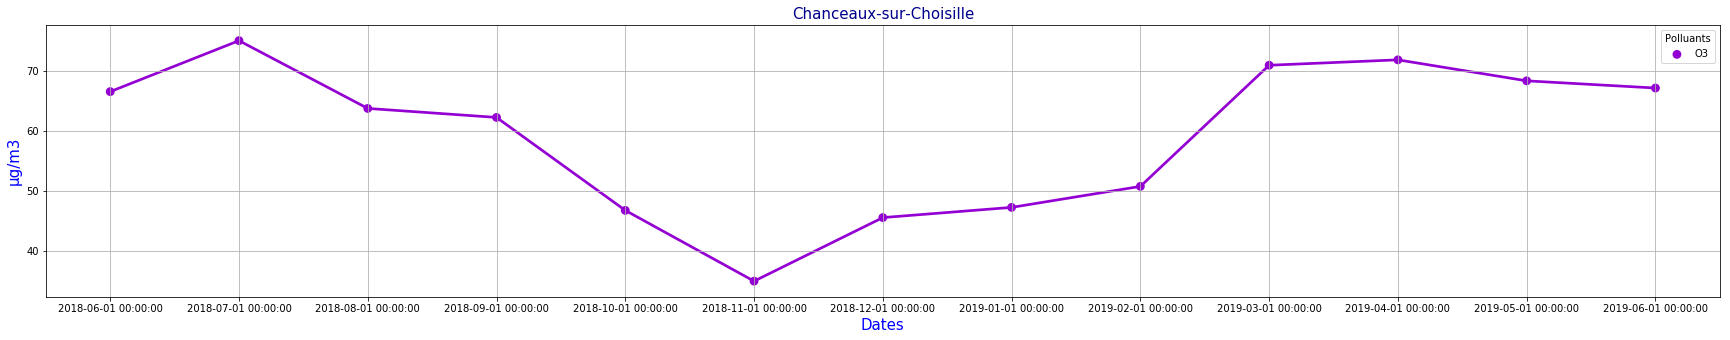

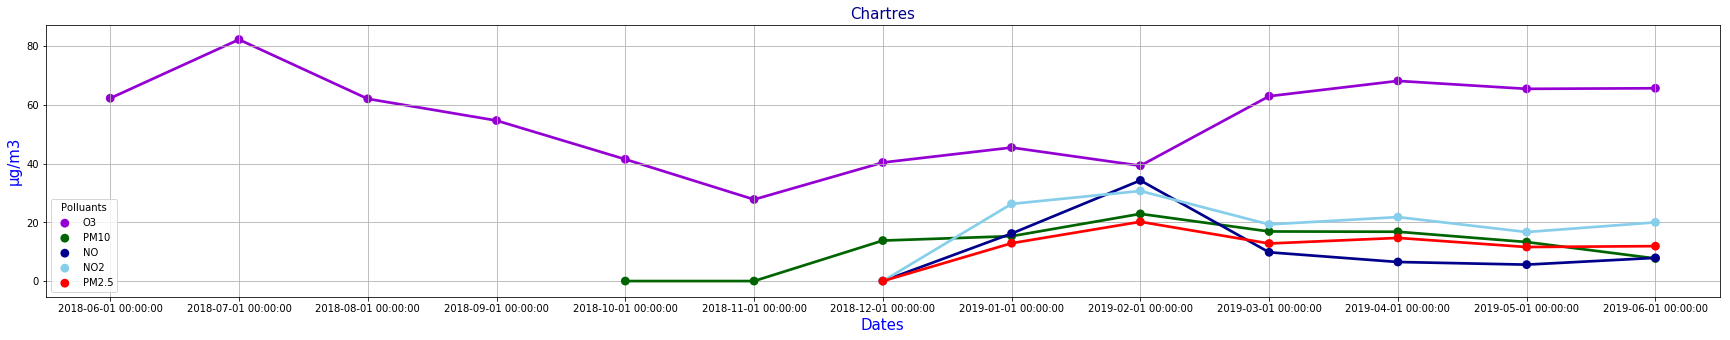

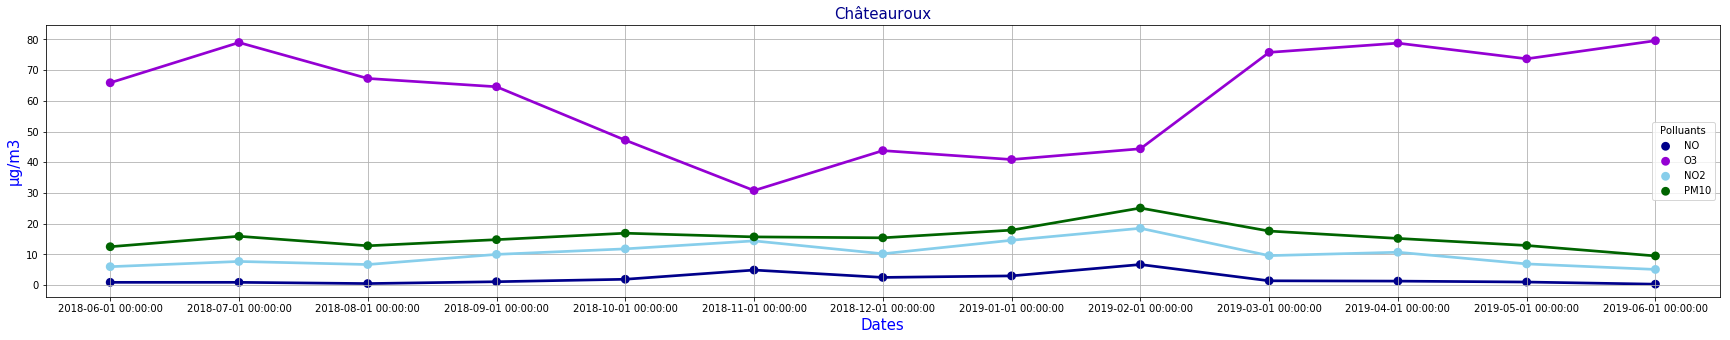

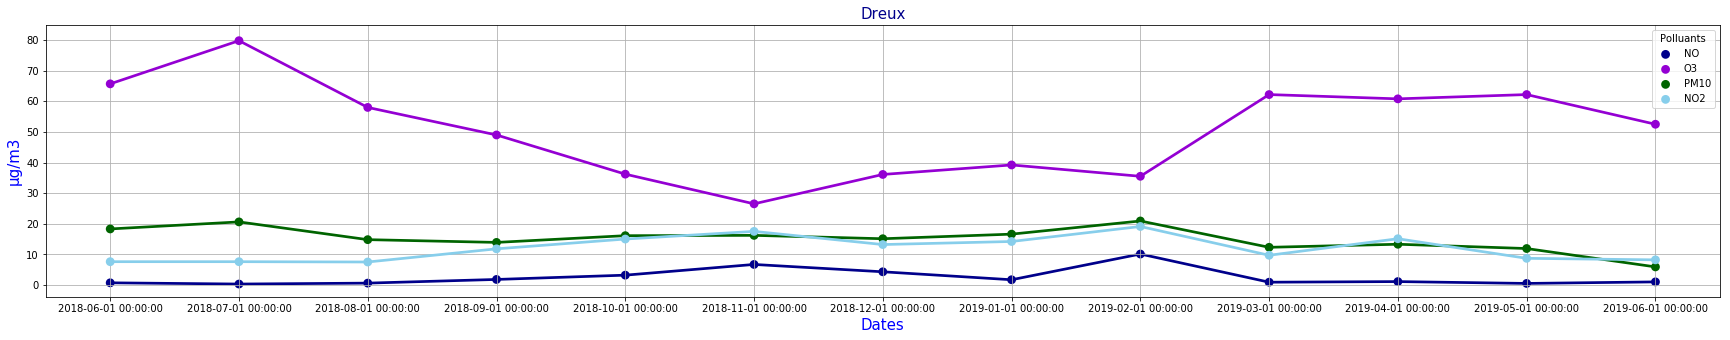

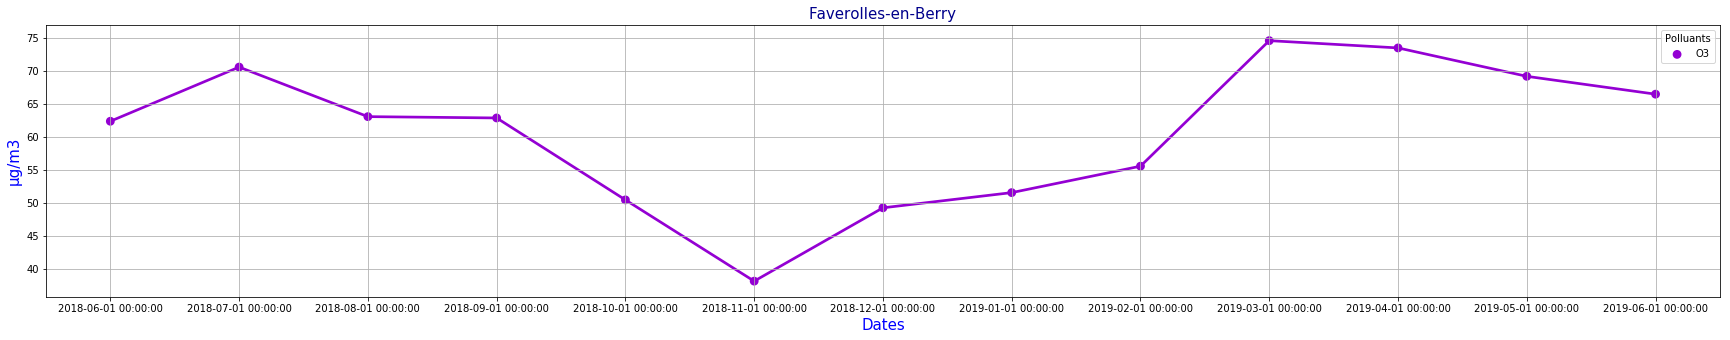

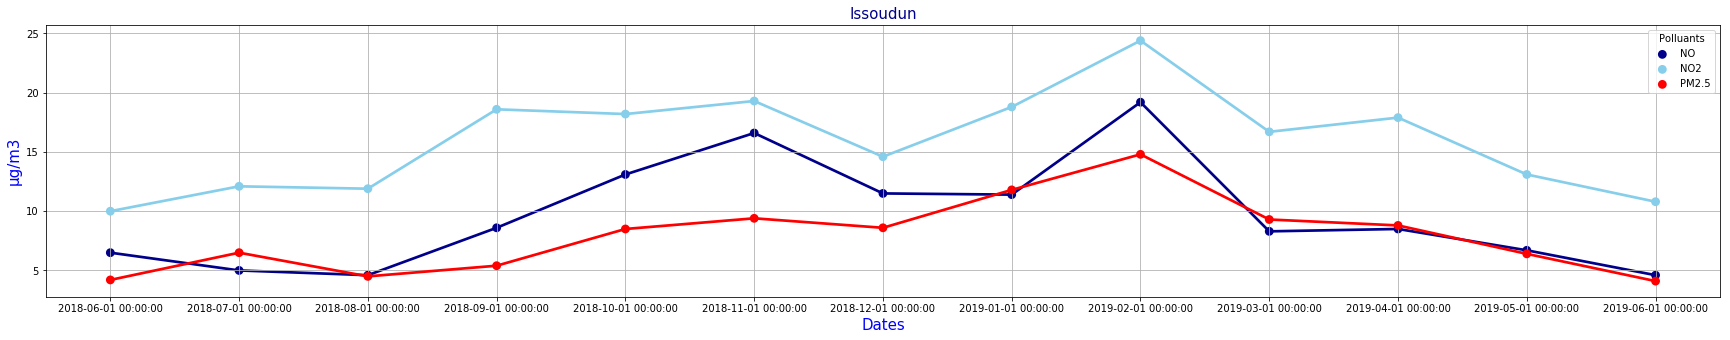

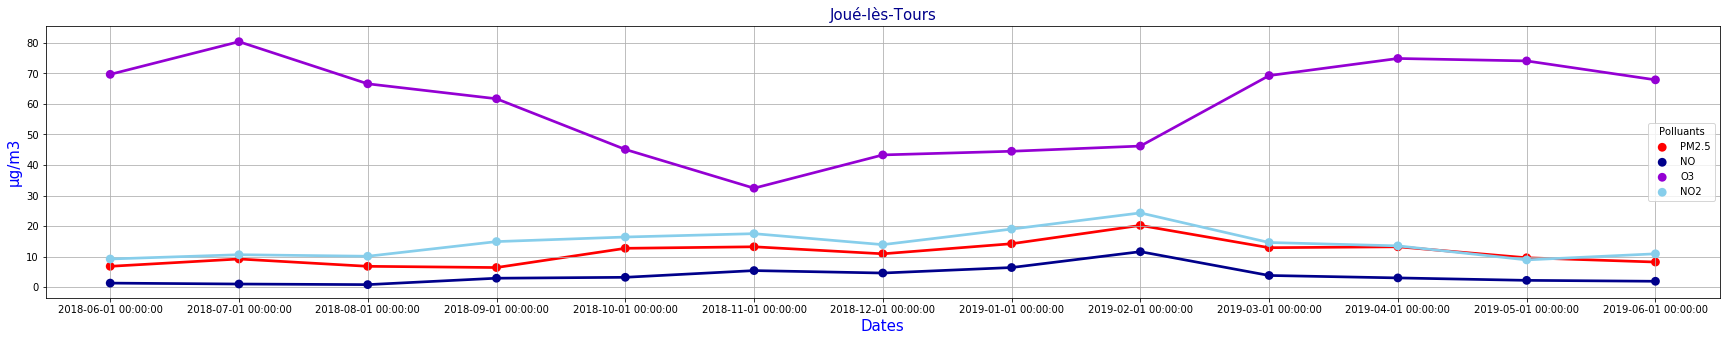

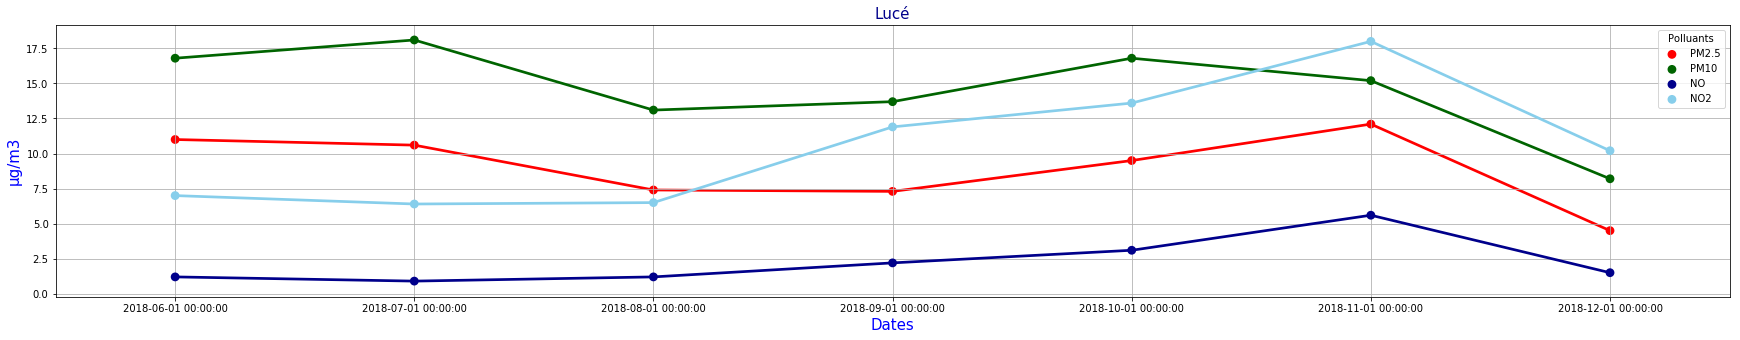

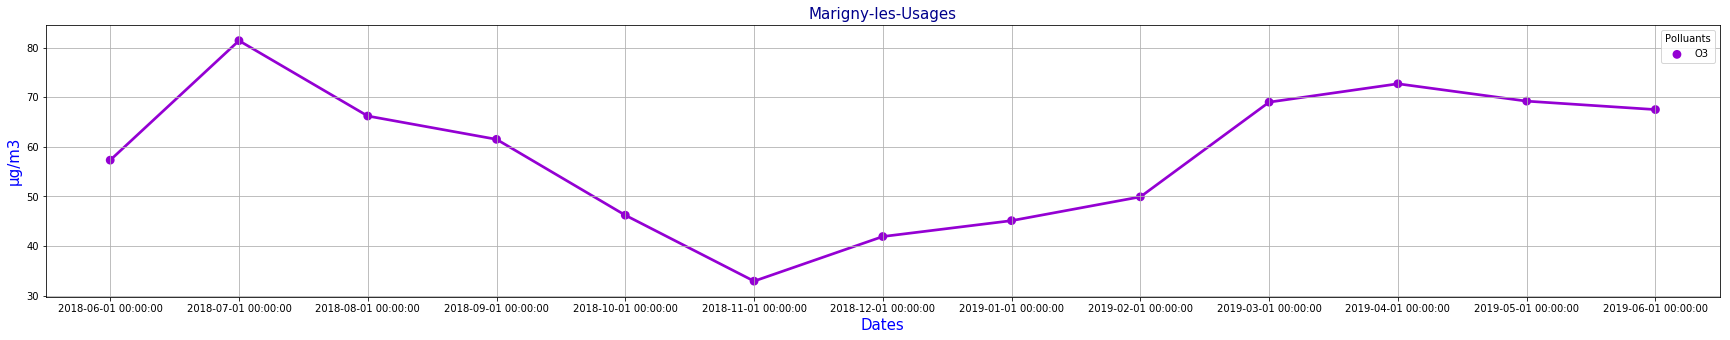

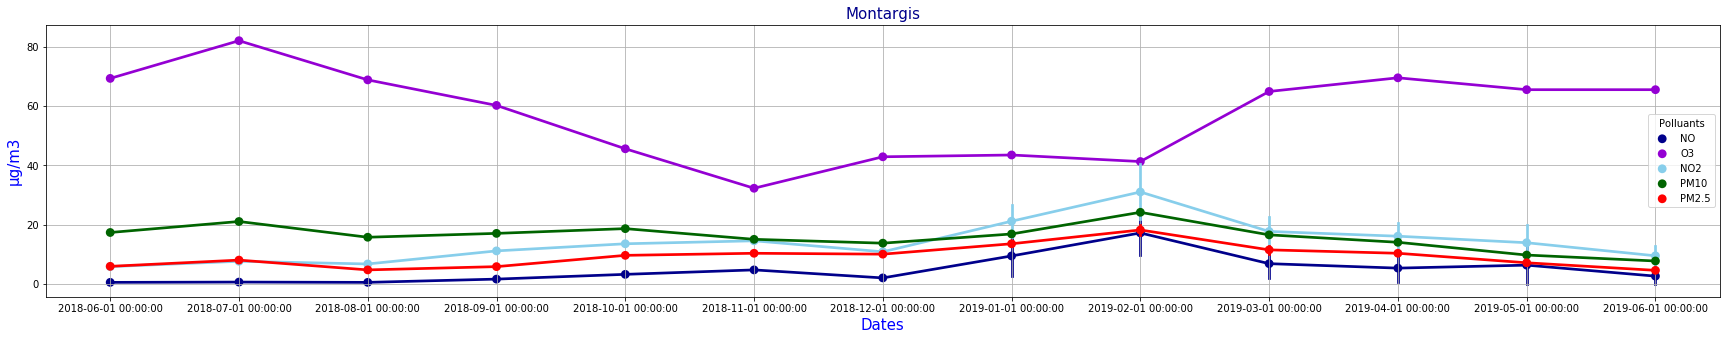

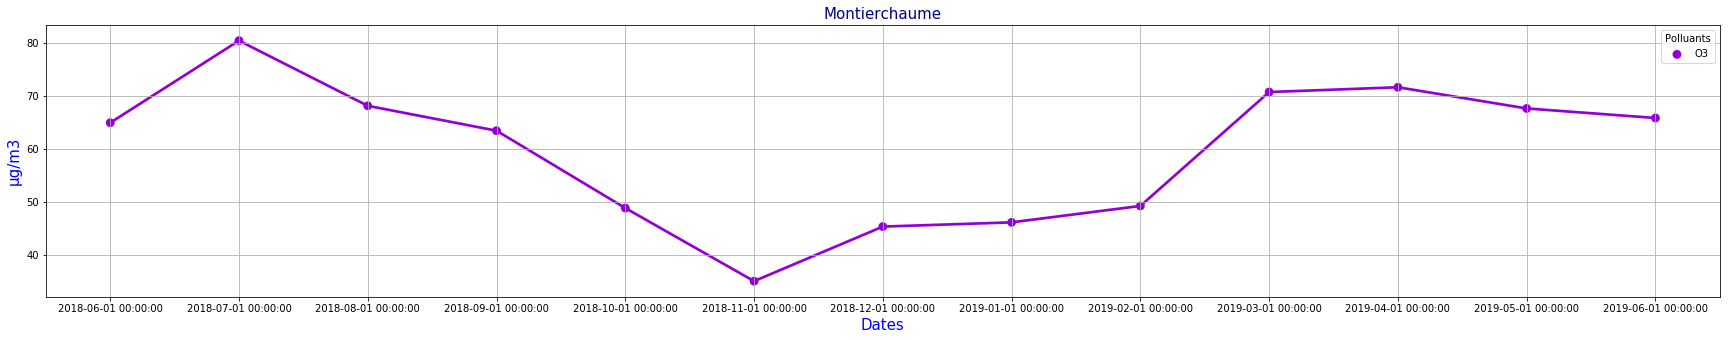

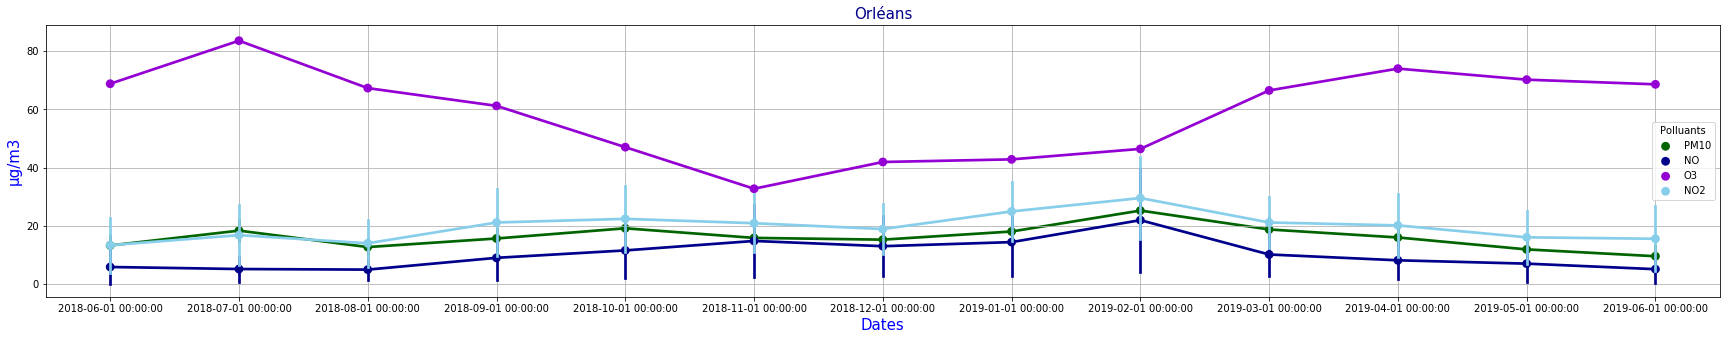

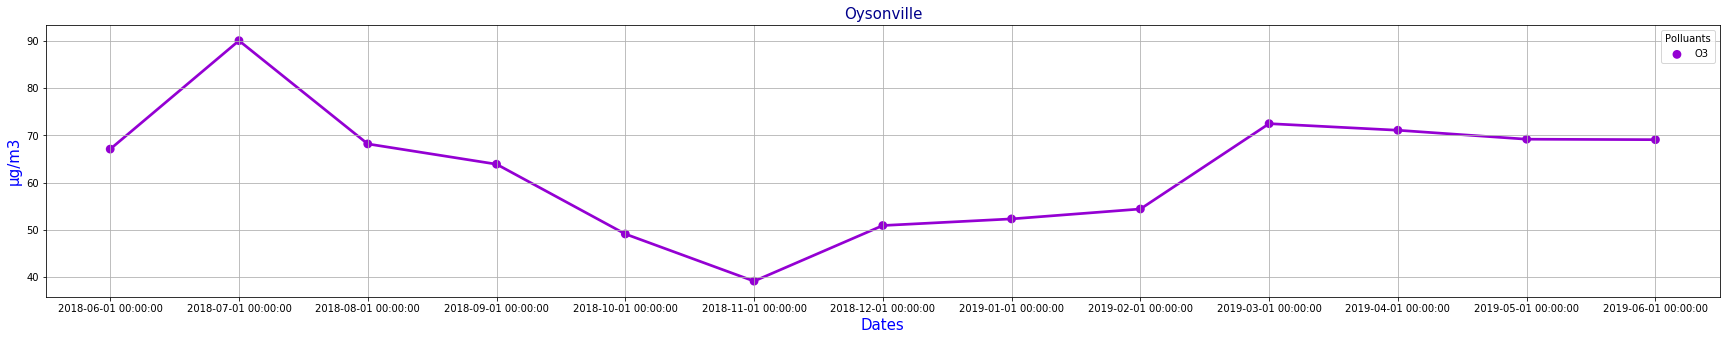

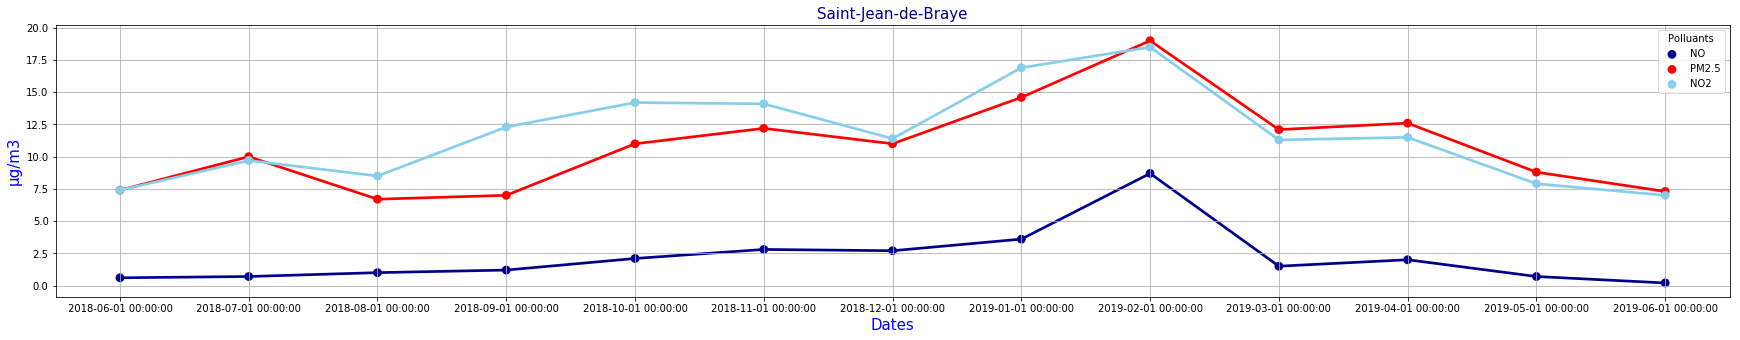

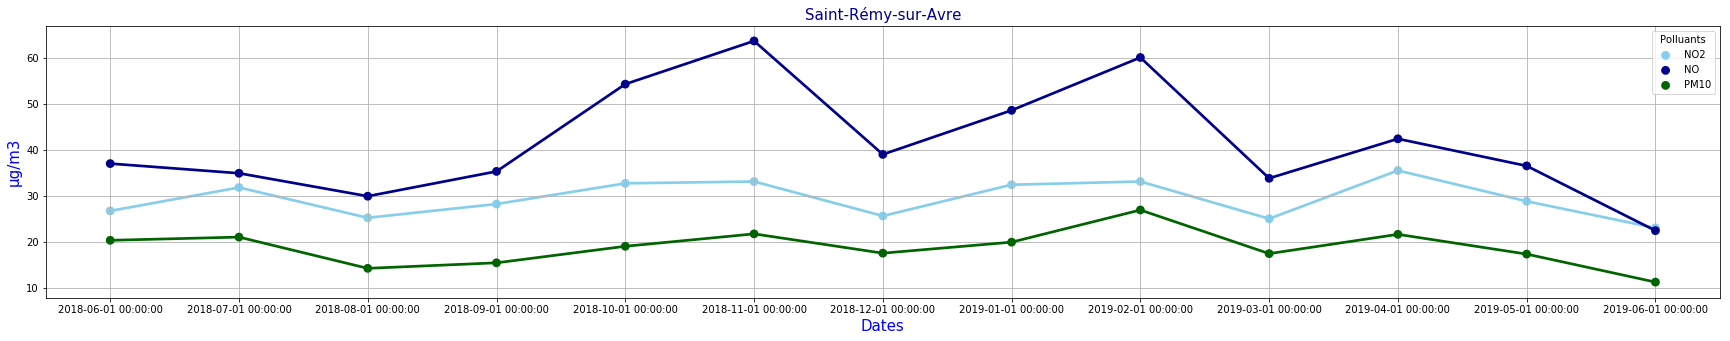

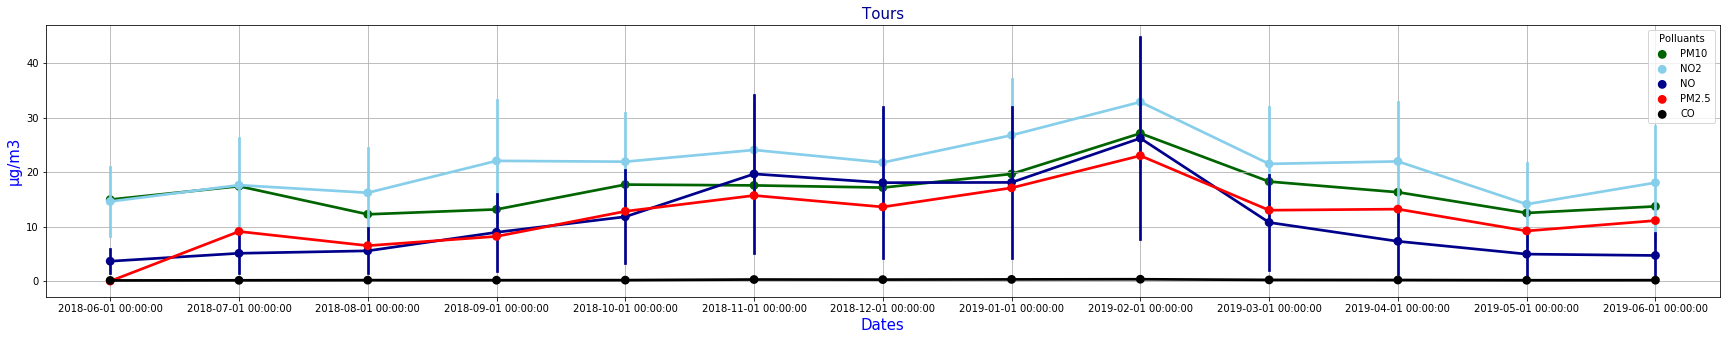

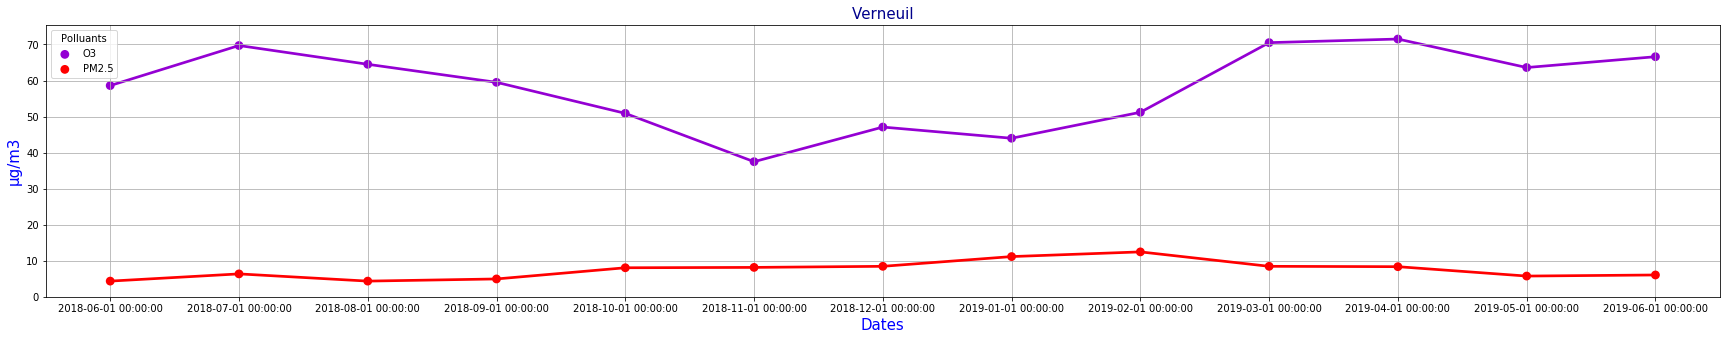

In [10]:
#------------------------------------------------------------------Bourges
f,ax1 = plt.subplots(figsize =(30,5))
Bourges_graph = sns.pointplot(
        x='attributes.date_debut',
        y='attributes.valeur',
        hue="attributes.nom_polluant",
        palette=Polluants_type_colors,
        data=Bourges,
        alpha=0.8)
Bourges_graph.legend(title='Polluants')
plt.title('Bourges', fontsize = 15,color='darkblue')
plt.xlabel('Dates',fontsize = 15,color='blue')
plt.ylabel('µg/m3',fontsize = 15,color='blue')
plt.grid()
Bourges_graph.figure.savefig('Bourges_graph.jpg', dpi=60)
#-----------------------------------------------------------------Blois
f,ax1 = plt.subplots(figsize =(30,5))
Blois_graph = sns.pointplot(
        x='attributes.date_debut',
        y='attributes.valeur',
        hue="attributes.nom_polluant",
        palette=Polluants_type_colors,
        data=Blois,
        alpha=0.8)
Blois_graph.legend(title='Polluants')
plt.title('Blois', fontsize = 15,color='darkblue')
plt.xlabel('Dates',fontsize = 15,color='blue')
plt.ylabel('µg/m3',fontsize = 15,color='blue')
plt.grid()
Blois_graph.figure.savefig('Blois_graph.jpg', dpi=60)
#------------------------------------------------------------------Chanceaux-sur-Choisille
f,ax1 = plt.subplots(figsize =(30,5))
Chanceaux_sur_Choisille_graph = sns.pointplot(
        x='attributes.date_debut',
        y='attributes.valeur',
        hue="attributes.nom_polluant",
        palette=Polluants_type_colors,
        data=Chanceaux_sur_Choisille,
        alpha=0.8)
Chanceaux_sur_Choisille_graph.legend(title='Polluants')
plt.title('Chanceaux-sur-Choisille', fontsize = 15,color='darkblue')
plt.xlabel('Dates',fontsize = 15,color='blue')
plt.ylabel('µg/m3',fontsize = 15,color='blue')
plt.grid()
Chanceaux_sur_Choisille_graph.figure.savefig('Chanceaux_sur_Choisille_graph.jpg', dpi=60)
#------------------------------------------------------------------Chartres
f,ax1 = plt.subplots(figsize =(30,5))
Chartres_graph = sns.pointplot(
        x='attributes.date_debut',
        y='attributes.valeur',
        hue="attributes.nom_polluant",
        palette=Polluants_type_colors,
        data=Chartres,
        alpha=0.8)
Chartres_graph.legend(title='Polluants')
plt.title('Chartres', fontsize = 15,color='darkblue')
plt.xlabel('Dates',fontsize = 15,color='blue')
plt.ylabel('µg/m3',fontsize = 15,color='blue')
plt.grid()
Chartres_graph.figure.savefig('Chartres_graph.jpg', dpi=60)
#------------------------------------------------------------------Châteauroux
f,ax1 = plt.subplots(figsize =(30,5))
Chateauroux_graph = sns.pointplot(
        x='attributes.date_debut',
        y='attributes.valeur',
        hue="attributes.nom_polluant",
        palette=Polluants_type_colors,
        data=Chateauroux,
        alpha=0.8)
Chateauroux_graph.legend(title='Polluants')
plt.title('Châteauroux', fontsize = 15,color='darkblue')
plt.xlabel('Dates',fontsize = 15,color='blue')
plt.ylabel('µg/m3',fontsize = 15,color='blue')
plt.grid()
Chateauroux_graph.figure.savefig('Chateauroux_graph.jpg', dpi=60)
#------------------------------------------------------------------Dreux
f,ax1 = plt.subplots(figsize =(30,5))
Dreux_graph = sns.pointplot(
        x='attributes.date_debut',
        y='attributes.valeur',
        hue="attributes.nom_polluant",
        palette=Polluants_type_colors,
        data=Dreux,
        alpha=0.8)
Dreux_graph.legend(title='Polluants')
plt.title('Dreux', fontsize = 15,color='darkblue')
plt.xlabel('Dates',fontsize = 15,color='blue')
plt.ylabel('µg/m3',fontsize = 15,color='blue')
plt.grid()
Dreux_graph.figure.savefig('Dreux_graph.jpg', dpi=60)
#------------------------------------------------------------------Faverolles-en-Berry
f,ax1 = plt.subplots(figsize =(30,5))
Faverolles_en_Berry_graph = sns.pointplot(
        x='attributes.date_debut',
        y='attributes.valeur',
        hue="attributes.nom_polluant",
        palette=Polluants_type_colors,
        data=Faverolles_en_Berry,
        alpha=0.8)
Faverolles_en_Berry_graph.legend(title='Polluants')
plt.title('Faverolles-en-Berry', fontsize = 15,color='darkblue')
plt.xlabel('Dates',fontsize = 15,color='blue')
plt.ylabel('µg/m3',fontsize = 15,color='blue')
plt.grid()
Faverolles_en_Berry_graph.figure.savefig('Faverolles_en_Berry_graph.jpg', dpi=60)
#------------------------------------------------------------------Issoudun
f,ax1 = plt.subplots(figsize =(30,5))
Issoudun_graph = sns.pointplot(
        x='attributes.date_debut',
        y='attributes.valeur',
        hue="attributes.nom_polluant",
        palette=Polluants_type_colors,
        data=Issoudun,
        alpha=0.8)
Issoudun_graph.legend(title='Polluants')
plt.title('Issoudun', fontsize = 15,color='darkblue')
plt.xlabel('Dates',fontsize = 15,color='blue')
plt.ylabel('µg/m3',fontsize = 15,color='blue')
plt.grid()
Issoudun_graph.figure.savefig('Issoudun_graph.jpg', dpi=60)
#------------------------------------------------------------------Joué-lès-Tours
f,ax1 = plt.subplots(figsize =(30,5))
Joue_les_Tours_graph = sns.pointplot(
        x='attributes.date_debut',
        y='attributes.valeur',
        hue="attributes.nom_polluant",
        palette=Polluants_type_colors,
        data=Joue_les_Tours,
        alpha=0.8)
Joue_les_Tours_graph.legend(title='Polluants')
plt.title('Joué-lès-Tours', fontsize = 15,color='darkblue')
plt.xlabel('Dates',fontsize = 15,color='blue')
plt.ylabel('µg/m3',fontsize = 15,color='blue')
plt.grid()
Joue_les_Tours_graph.figure.savefig('Joue_les_Tours_graph.jpg', dpi=60)
#------------------------------------------------------------------Lucé
f,ax1 = plt.subplots(figsize =(30,5))
Luce_graph = sns.pointplot(
        x='attributes.date_debut',
        y='attributes.valeur',
        hue="attributes.nom_polluant",
        palette=Polluants_type_colors,
        data=Luce,
        alpha=0.8)
Luce_graph.legend(title='Polluants')
plt.title('Lucé', fontsize = 15,color='darkblue')
plt.xlabel('Dates',fontsize = 15,color='blue')
plt.ylabel('µg/m3',fontsize = 15,color='blue')
plt.grid()
Luce_graph.figure.savefig('Luce_graph.jpg', dpi=60)
#------------------------------------------------------------------Marigny-les-Usages
f,ax1 = plt.subplots(figsize =(30,5))
Marigny_les_Usages_graph = sns.pointplot(
        x='attributes.date_debut',
        y='attributes.valeur',
        hue="attributes.nom_polluant",
        palette=Polluants_type_colors,
        data=Marigny_les_Usages,
        alpha=0.8)
Marigny_les_Usages_graph.legend(title='Polluants')
plt.title('Marigny-les-Usages', fontsize = 15,color='darkblue')
plt.xlabel('Dates',fontsize = 15,color='blue')
plt.ylabel('µg/m3',fontsize = 15,color='blue')
plt.grid()
Marigny_les_Usages_graph.figure.savefig('Marigny_les_Usages_graph.jpg', dpi=60)
#------------------------------------------------------------------Montargis
f,ax1 = plt.subplots(figsize =(30,5))
Montargis_graph = sns.pointplot(
        x='attributes.date_debut',
        y='attributes.valeur',
        hue="attributes.nom_polluant",
        palette=Polluants_type_colors,
        data=Montargis,
        alpha=0.8)
Montargis_graph.legend(title='Polluants')
plt.title('Montargis', fontsize = 15,color='darkblue')
plt.xlabel('Dates',fontsize = 15,color='blue')
plt.ylabel('µg/m3',fontsize = 15,color='blue')
plt.grid()
Montargis_graph.figure.savefig('Montargis_graph.jpg', dpi=60)
#------------------------------------------------------------------Montierchaume
f,ax1 = plt.subplots(figsize =(30,5))
Montierchaume_graph = sns.pointplot(
        x='attributes.date_debut',
        y='attributes.valeur',
        hue="attributes.nom_polluant",
        palette=Polluants_type_colors,
        data=Montierchaume,
        alpha=0.8)
Montierchaume_graph.legend(title='Polluants')
plt.title('Montierchaume', fontsize = 15,color='darkblue')
plt.xlabel('Dates',fontsize = 15,color='blue')
plt.ylabel('µg/m3',fontsize = 15,color='blue')
plt.grid()
Montierchaume_graph.figure.savefig('Montierchaume_graph.jpg', dpi=60)
#------------------------------------------------------------------Orléans
f,ax1 = plt.subplots(figsize =(30,5))
Orleans_graph = sns.pointplot(
        x='attributes.date_debut',
        y='attributes.valeur',
        hue="attributes.nom_polluant",
        palette=Polluants_type_colors,
        data=Orleans,
        alpha=0.8)
Orleans_graph.legend(title='Polluants')
plt.title('Orléans', fontsize = 15,color='darkblue')
plt.xlabel('Dates',fontsize = 15,color='blue')
plt.ylabel('µg/m3',fontsize = 15,color='blue')
plt.grid()
Orleans_graph.figure.savefig('Orleans_graph.jpg', dpi=60)
#------------------------------------------------------------------Oysonville
f,ax1 = plt.subplots(figsize =(30,5))
Oysonville_graph = sns.pointplot(
        x='attributes.date_debut',
        y='attributes.valeur',
        hue="attributes.nom_polluant",
        palette=Polluants_type_colors,
        data=Oysonville,
        alpha=0.8)
Oysonville_graph.legend(title='Polluants')
plt.title('Oysonville', fontsize = 15,color='darkblue')
plt.xlabel('Dates',fontsize = 15,color='blue')
plt.ylabel('µg/m3',fontsize = 15,color='blue')
plt.grid()
Oysonville_graph.figure.savefig('Oysonville_graph.jpg', dpi=60)
#------------------------------------------------------------------Saint-Jean-de-Braye
f,ax1 = plt.subplots(figsize =(30,5))
Saint_Jean_de_Braye_graph = sns.pointplot(
        x='attributes.date_debut',
        y='attributes.valeur',
        hue="attributes.nom_polluant",
        palette=Polluants_type_colors,
        data=Saint_Jean_de_Braye,
        alpha=0.8)
Saint_Jean_de_Braye_graph.legend(title='Polluants')
plt.title('Saint-Jean-de-Braye', fontsize = 15,color='darkblue')
plt.xlabel('Dates',fontsize = 15,color='blue')
plt.ylabel('µg/m3',fontsize = 15,color='blue')
plt.grid()
Saint_Jean_de_Braye_graph.figure.savefig('Saint_Jean_de_Braye_graph.jpg', dpi=60)
#------------------------------------------------------------------Saint-Rémy-sur-Avre
f,ax1 = plt.subplots(figsize =(30,5))
Saint_Remy_sur_Avre_graph = sns.pointplot(
        x='attributes.date_debut',
        y='attributes.valeur',
        hue="attributes.nom_polluant",
        palette=Polluants_type_colors,
        data=Saint_Remy_sur_Avre,
        alpha=0.8)
Saint_Remy_sur_Avre_graph.legend(title='Polluants')
plt.title('Saint-Rémy-sur-Avre', fontsize = 15,color='darkblue')
plt.xlabel('Dates',fontsize = 15,color='blue')
plt.ylabel('µg/m3',fontsize = 15,color='blue')
plt.grid()
Saint_Remy_sur_Avre_graph.figure.savefig('Saint_Remy_sur_Avre_graph.jpg', dpi=60)
#------------------------------------------------------------------Tours
f,ax1 = plt.subplots(figsize =(30,5))
Tours_graph = sns.pointplot(
        x='attributes.date_debut',
        y='attributes.valeur',
        hue="attributes.nom_polluant",
        palette=Polluants_type_colors,
        data=Tours,
        alpha=0.8)
Tours_graph.legend(title='Polluants')
plt.title('Tours', fontsize = 15,color='darkblue')
plt.xlabel('Dates',fontsize = 15,color='blue')
plt.ylabel('µg/m3',fontsize = 15,color='blue')
plt.grid()
Tours_graph.figure.savefig('Tours_graph.jpg', dpi=60)
#------------------------------------------------------------------Verneuil
f,ax1 = plt.subplots(figsize =(30,5))
Verneuil_graph = sns.pointplot(
        x='attributes.date_debut',
        y='attributes.valeur',
        hue="attributes.nom_polluant",
        palette=Polluants_type_colors,
        data=Verneuil,
        alpha=0.8)
Verneuil_graph.legend(title='Polluants')
plt.title('Verneuil', fontsize = 15,color='darkblue')
plt.xlabel('Dates',fontsize = 15,color='blue')
plt.ylabel('µg/m3',fontsize = 15,color='blue')
plt.grid()
Verneuil_graph.figure.savefig('Verneuil_graph.jpg', dpi=60)

## Création des popup

In [11]:
#-----------------------Blois
html_Blois=folium.Html("""<img src=Blois_graph.jpg></img>""", script=True)
popup_Blois = folium.Popup(html_Blois, max_width=2650)
#-----------------------Bourges
html_Bourges=folium.Html("""<img src=Bourges_graph.jpg></img>""", script=True)
popup_Bourges = folium.Popup(html_Bourges, max_width=2650)
#-----------------------Chanceaux
html_Chanceaux=folium.Html("""<img src=Chanceaux_sur_Choisille_graph.jpg></img>""", script=True)
popup_Chanceaux = folium.Popup(html_Chanceaux, max_width=2650)
#-----------------------Chartres
html_Chartres=folium.Html("""<img src=Chartres_graph.jpg></img>""", script=True)
popup_Chartres = folium.Popup(html_Chartres, max_width=2650)
#-----------------------Chateauroux
html_Chateauroux=folium.Html("""<img src=Chateauroux_graph.jpg></img>""", script=True)
popup_Chateauroux = folium.Popup(html_Chateauroux, max_width=2650)
#-----------------------Dreux
html_Dreux=folium.Html("""<img src=Dreux_graph.jpg></img>""", script=True)
popup_Dreux = folium.Popup(html_Dreux, max_width=2650)
#-----------------------Faverolles
html_Faverolles=folium.Html("""<img src=Faverolles_en_Berry_graph.jpg></img>""", script=True)
popup_Faverolles = folium.Popup(html_Faverolles, max_width=2650)
#-----------------------Issoudun
html_Issoudun=folium.Html("""<img src=Issoudun_graph.jpg></img>""", script=True)
popup_Issoudun = folium.Popup(html_Issoudun, max_width=2650)
#-----------------------Joue
html_Joue=folium.Html("""<img src=Joue_les_Tours_graph.jpg></img>""", script=True)
popup_Joue = folium.Popup(html_Joue, max_width=2650)
#-----------------------Luce
html_Luce=folium.Html("""<img src=Luce_graph.jpg></img>""", script=True)
popup_Luce = folium.Popup(html_Luce, max_width=2650)
#-----------------------Marigny
html_Marigny=folium.Html("""<img src=Marigny_les_Usages_graph.jpg></img>""", script=True)
popup_Marigny = folium.Popup(html_Marigny, max_width=2650)
#-----------------------Montargis
html_Montargis=folium.Html("""<img src=Montargis_graph.jpg></img>""", script=True)
popup_Montargis = folium.Popup(html_Montargis, max_width=2650)
#-----------------------Montierchaume
html_Montierchaume=folium.Html("""<img src=Montierchaume_graph.jpg></img>""", script=True)
popup_Montierchaume = folium.Popup(html_Montierchaume, max_width=2650)
#-----------------------Orleans
html_Orleans=folium.Html("""<img src=Orleans_graph.jpg></img>""", script=True)
popup_Orleans = folium.Popup(html_Orleans, max_width=2650)
#-----------------------Oysonville
html_Oysonville=folium.Html("""<img src=Oysonville_graph.jpg></img>""", script=True)
popup_Oysonville = folium.Popup(html_Oysonville, max_width=2650)
#-----------------------Saint_Jean
html_Saint_Jean=folium.Html("""<img src=Saint_Jean_de_Braye_graph.jpg></img>""", script=True)
popup_Saint_Jean = folium.Popup(html_Saint_Jean, max_width=2650)
#-----------------------Saint_Remy
html_Saint_Remy=folium.Html("""<img src=Saint_Remy_sur_Avre_graph.jpg></img>""", script=True)
popup_Saint_Remy = folium.Popup(html_Saint_Remy, max_width=2650)
#-----------------------Tours
html_Tours=folium.Html("""<img src=Tours_graph.jpg></img>""", script=True)
popup_Tours = folium.Popup(html_Tours, max_width=2650)
#-----------------------Verneuil
html_Verneuil=folium.Html("""<img src=Verneuil_graph.jpg></img>""", script=True)
popup_Verneuil = folium.Popup(html_Verneuil, max_width=50)


## Création de listes

In [12]:
# Liste générale
liste_popup=[popup_Blois,popup_Bourges,popup_Chanceaux,popup_Chartres,popup_Chateauroux,popup_Dreux,popup_Faverolles,popup_Issoudun,popup_Joue,popup_Luce,popup_Marigny,popup_Montargis,popup_Montierchaume,popup_Orleans,popup_Oysonville,popup_Saint_Jean,popup_Saint_Remy,popup_Tours,popup_Verneuil]
# liste NOgp_popup
NOgp_popup = [popup_Blois,popup_Bourges,popup_Chartres,popup_Chateauroux,popup_Dreux,popup_Issoudun,popup_Joue,popup_Luce,popup_Montargis,popup_Orleans,popup_Saint_Jean,popup_Saint_Remy,popup_Tours]
# liste NO2gp_popup
NO2gp_popup = [popup_Blois,popup_Bourges,popup_Chartres,popup_Chateauroux,popup_Dreux,popup_Issoudun,popup_Joue,popup_Luce,popup_Montargis,popup_Orleans,popup_Saint_Jean,popup_Saint_Remy,popup_Tours]
# liste O3gp_popup
O3gp_popup = [popup_Blois,popup_Bourges,popup_Chanceaux,popup_Chartres,popup_Chateauroux,popup_Dreux,popup_Faverolles,popup_Joue,popup_Marigny,popup_Montargis,popup_Montierchaume,popup_Orleans,popup_Oysonville,popup_Verneuil]
# liste PM2gp_popup
PM2gp_popup = [popup_Chartres,popup_Issoudun,popup_Joue,popup_Luce,popup_Montargis,popup_Saint_Jean,popup_Tours,popup_Verneuil]
# liste PM10gp_popup
PM10gp_popup = [popup_Blois,popup_Bourges,popup_Chartres,popup_Chateauroux,popup_Dreux,popup_Luce,popup_Montargis,popup_Orleans,popup_Saint_Remy,popup_Tours]
# liste COgp_popup
COgp_popup = [popup_Tours]

## Ajout des Marker sur la carte principale

In [13]:
for i in range(len(posVille)):
   folium.Marker(
      location=[posVille.iloc[i]['attributes.y_wgs84'], posVille.iloc[i]['attributes.x_wgs84']],
      icon=folium.Icon(icon='cloud', color='gray'),
      popup=liste_popup[i],
      tooltip="Cliquer pour plus d'infos",
   ).add_to(carte)

carte.save('Carte résumé.html')

carte

## Comparaison de ce que l'on viens de faire, mais avec une boucle...

#### Ca prend quand même beaucoup moins de place...

## Création des cartes secondaires pour chaque polluants

### Carte polluant : NO                -   Même principe que pour la carte principale...

In [14]:
# Carte pour le polluant NO
NOc=df[(df["attributes.nom_polluant"] == "NO")]
NOgp=NOc.groupby(['attributes.nom_com']).mean()

carteNo = folium.Map(location = [47.5, 1.6833], zoom_start=8)
folium.GeoJson(
    overlay_region,  
    name='Région Centre'
).add_to(carteNo)
folium.LayerControl().add_to(carteNo)

for i in range(len(NOgp)):
    folium.CircleMarker(
    location=[NOgp.iloc[i]['attributes.y_wgs84'], NOgp.iloc[i]['attributes.x_wgs84']],
    radius=NOgp.iloc[i]['attributes.valeur']*3,
    color='darkblue',
    tooltip="Cliquer pour plus d'infos",
    popup=NOgp_popup[i],
    fill=True,
    fill_color='darkblue'
   ).add_to(carteNo)

carteNo.save("Carte NO.html")

carteNo

### Les  autres cartes...

In [15]:
# Carte pour le polluant PM 10
PM10c=df[(df["attributes.nom_polluant"] == "PM10")]
PM10gp=PM10c.groupby(['attributes.nom_com']).mean()

cartePM10 = folium.Map(location = [47.5, 1.6833], zoom_start=8)
folium.GeoJson(
    overlay_region,  
    name='Région Centre'
).add_to(cartePM10)
folium.LayerControl().add_to(cartePM10)

for i in range(len(PM10gp)):
    folium.CircleMarker(
    location=[PM10gp.iloc[i]['attributes.y_wgs84'], PM10gp.iloc[i]['attributes.x_wgs84']],
    radius=PM10gp.iloc[i]['attributes.valeur']*3,
    color='darkgreen',
    tooltip="Cliquer pour plus d'infos",
    popup=PM10gp_popup[i],
    fill=True,
    fill_color='darkgreen'
   ).add_to(cartePM10)

cartePM10.save("Carte PM 10.html")

# Carte pour le polluant PM 2.5
PM2c=df[(df["attributes.nom_polluant"] == "PM2.5")]
PM2gp=PM2c.groupby(['attributes.nom_com']).mean()

cartePM2 = folium.Map(location = [47.5, 1.6833], zoom_start=8)
folium.GeoJson(
    overlay_region,  
    name='Région Centre'
).add_to(cartePM2)
folium.LayerControl().add_to(cartePM2)

for i in range(len(PM2gp)):
    folium.CircleMarker(
    location=[PM2gp.iloc[i]['attributes.y_wgs84'], PM2gp.iloc[i]['attributes.x_wgs84']],
    radius=PM2gp.iloc[i]['attributes.valeur']*3,
    color='red',
    tooltip="Cliquer pour plus d'infos",
    popup=PM2gp_popup[i],
    fill=True,
    fill_color='red'
   ).add_to(cartePM2)

cartePM2.save("Carte PM 2_5.html")

# Carte pour le polluant NO2
NO2c=df[(df["attributes.nom_polluant"] == "NO2")]
NO2gp=NO2c.groupby(['attributes.nom_com']).mean()

carteNO2 = folium.Map(location = [47.5, 1.6833], zoom_start=8)
folium.GeoJson(
    overlay_region,  
    name='Région Centre'
).add_to(carteNO2)
folium.LayerControl().add_to(carteNO2)

for i in range(len(NO2gp)):
    folium.CircleMarker(
    location=[NO2gp.iloc[i]['attributes.y_wgs84'], NO2gp.iloc[i]['attributes.x_wgs84']],
    radius=NO2gp.iloc[i]['attributes.valeur']*3,
    color='skyblue',
    tooltip="Cliquer pour plus d'infos",
    popup=NO2gp_popup[i],
    fill=True,
    fill_color='skyblue'
   ).add_to(carteNO2)

carteNO2.save("Carte NO2.html")

# Carte pour le polluant O3
O3c=df[(df["attributes.nom_polluant"] == "O3")]
O3gp=O3c.groupby(['attributes.nom_com']).mean()

carteO3 = folium.Map(location = [47.5, 1.6833], zoom_start=8)
folium.GeoJson(
    overlay_region,  
    name='Région Centre'
).add_to(carteO3)
folium.LayerControl().add_to(carteO3)

for i in range(len(O3gp)):
    folium.CircleMarker(
    location=[O3gp.iloc[i]['attributes.y_wgs84'], O3gp.iloc[i]['attributes.x_wgs84']],
    radius=O3gp.iloc[i]['attributes.valeur']/2,
    color='darkviolet',
    tooltip="Cliquer pour plus d'infos",
    popup=O3gp_popup[i],
    fill=True,
    fill_color='darkviolet'
   ).add_to(carteO3)

carteO3.save("Carte O3.html")

# Carte pour le polluant CO
COc=df[(df["attributes.nom_polluant"] == "CO")]
COgp=COc.groupby(['attributes.nom_com']).mean()

carteCO = folium.Map(location = [47.5, 1.6833], zoom_start=8)
folium.GeoJson(
    overlay_region,  
    name='Région Centre'
).add_to(carteCO)
folium.LayerControl().add_to(carteCO)

for i in range(len(COgp)):
    folium.CircleMarker(
    location=[COgp.iloc[i]['attributes.y_wgs84'], COgp.iloc[i]['attributes.x_wgs84']],
    radius=COgp.iloc[i]['attributes.valeur']*50,
    color='black',
    tooltip="Cliquer pour plus d'infos",
    popup=COgp_popup[i],
    fill=True,
    fill_color='black'
   ).add_to(carteCO)

carteCO.save("Carte CO.html")

In [16]:
cartePM10

In [17]:
cartePM2

In [18]:
carteNO2

In [19]:
carteO3

In [20]:
carteCO

## Même principe de boucle pour les cartes secondaires...

#### Beaucoup plus lisible...

### NOTRE CONSEIL POUR LE CLIENT

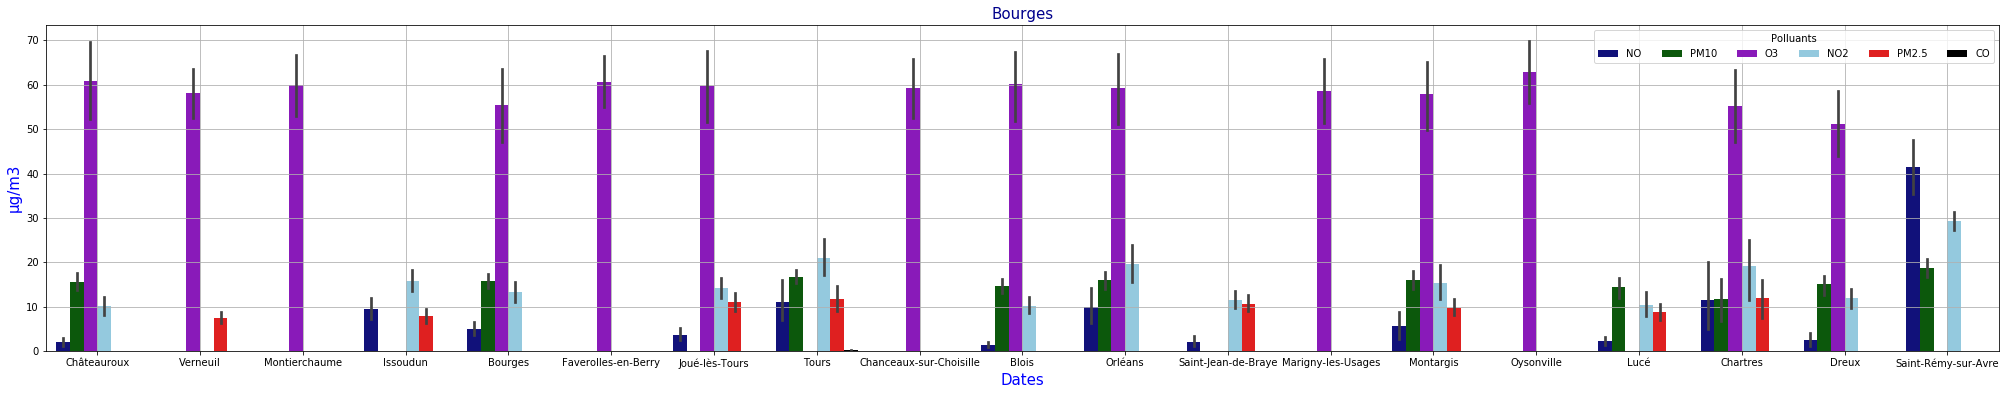

In [21]:
import requests
from pandas.io.json import json_normalize
import seaborn as SNS
import matplotlib.pyplot as plt
Listing=requests.get("https://services1.arcgis.com/HzzPcgRsxxyIZdlU/arcgis/rest/services/mes_centre_val_de_loire_mensuel_poll_princ_1/FeatureServer/0/query?where=1%3D1&outFields=*&outSR=4326&f=json").json()
result = json_normalize(Listing['features'])

pok_type_colors = {
  'NO': 'darkblue',
  'PM10': 'darkgreen',
  'O3': 'darkviolet',
  'NO2': 'skyblue',
  'PM2.5': 'red',
  'CO': 'black',
}

Table_couleur = SNS.barplot(x='attributes.nom_com', y="attributes.valeur",hue='attributes.nom_polluant', palette=pok_type_colors, data=result)
Table_couleur.figure.set_size_inches((35, 6))
Table_couleur.legend(ncol=6, title='Polluants');

import folium
MAPMOI= folium.Map(location=[47.383333, 0.683333], titles ="Polluant sur la carte")
plt.title('Bourges', fontsize = 15,color='darkblue')
plt.xlabel('Dates',fontsize = 15,color='blue')
plt.ylabel('µg/m3',fontsize = 15,color='blue')
plt.grid()
MAPMOI.save('Bilan_par_ville.html')

# FIN